In [1]:
import numpy as np
from iterate import iterate_z
import matplotlib.pyplot as plt

In [2]:
#setting number of iterations and number of points to run
N = 40
points = 300

x = np.linspace(-2, 2, points)
y = np.linspace(-2, 2, points)

X, Y = np.meshgrid(x,y)

# Generate 2D mesh of coordinates
#X, Y = np.meshgrid(x, y)

# Initializing two empty images, one for each task.
U = np.zeros((len(x), len(y)))
Un = U.copy()
Uc = np.zeros((len(x),len(y)), dtype=complex)

# now using iterate_z on each point in Points. Should get an array 
for i in range(len(x)):
    for m in range(len(y)):
        #an array of the complex numbers 
        Uc[i,m] = iterate_z(x[i],y[m],N)[0]
        #an array of the iteration numbers 
        Un[i,m] = iterate_z(x[i],y[m], N)[1]

In [3]:
# ok so now make mask to make binary plot
Umask = Un.copy()
mask = 1
#if the number of iterations is less than or equal to 0, becomes 0
#if greater than 1, becomes a one 
Umask[Umask <= mask] = 0
Umask[Umask > mask] = 1

In [4]:
#trying to get the right thing to use imshow on
print(Uc.shape)



(300, 300)


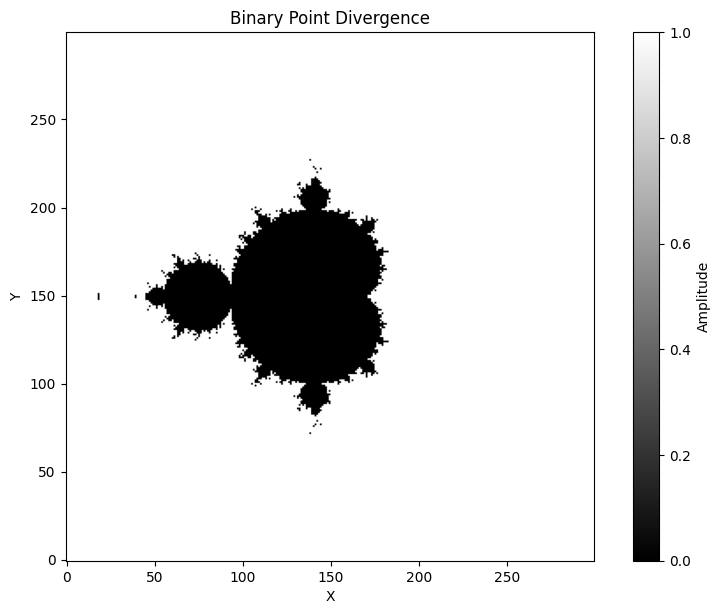

In [5]:
# now plotting the binary (hopefully)
plt.figure(figsize=(10,7), dpi=100)
plt.imshow(Umask.transpose(), cmap='gray', origin='lower')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Binary Point Divergence")
#plt.xticks(X)
#plt.yticks(Y)
plt.colorbar(label="Amplitude")
plt.savefig('Binary_q1.pdf')
plt.savefig('Binary_q1.png')
plt.show()

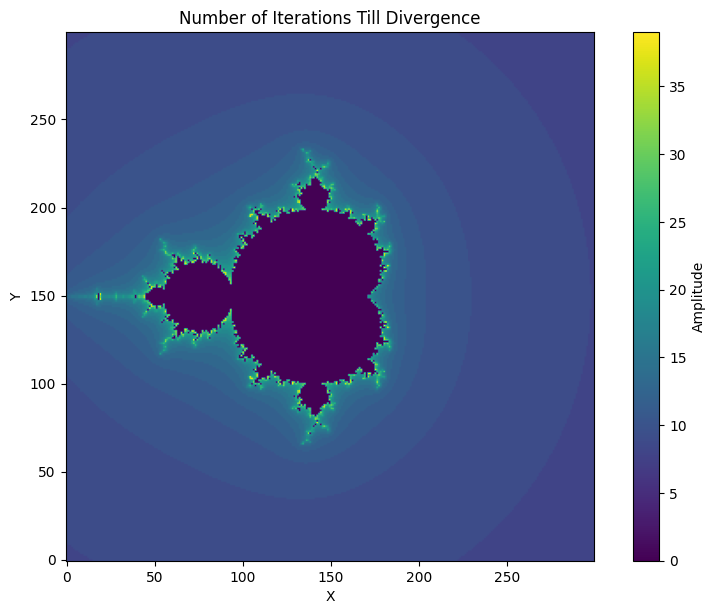

In [6]:
plt.figure(figsize=(10,7), dpi=100)
plt.imshow(Un.transpose(), origin='lower')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Number of Iterations Till Divergence")
plt.colorbar(label="Amplitude")
plt.savefig("color_Q1.pdf")
plt.savefig("color_Q1.png")
plt.show()

# Question 2 
The Lorenz Equations:

$$\dot{x} = -\sigma(x-y)$$
$$\dot{y} = rx - y - xz$$
$$\dot{z} = -bz + xy $$

In [7]:
from scipy.integrate import solve_ivp
#now defining a function to solve the above equations 

def lorenz_eqn(t, V, sig, r,b):
    """The Lorenz equations given in Question 2 of CTA200 assignment 3
    
    Parameters
    ---
    t: float
        Time the system is being evaluated at
    V: array (float)
        the three initial conditions (X,Y,Z)
    sig: float 
         constnat
    r: float 
         constant
    b: float
         constant 
         
    Returns 
    ----
    xdot,ydot,zdot: floats
            Time derivative of the three equations                       
    
    """
    x,y,z = V
    #now writing the equations 
    xdot = -1*sig*(x-y)
    ydot = r*x-y-x*z
    zdot = -b*z+x*y
    
    return xdot,ydot,zdot 

In [8]:
#now set initial conditions 
W0 = np.array([0,1,0]) 

#set the parameters using Lorenz's IC
Sig, R, B = 10, 28, 8/3

#set integration bounds 
tEval = np.linspace(0,60,6000)
tSpan = [0,60]

#make the function that will run solve_ivp on lorenz_eqn 

def sol_lorenz_eqn(V):
    """Funs solve_ivp on lorenz_eqn
    Parameters
    ----
    V: array-like 
        initial conditions 
    """
    return solve_ivp( fun=lambda t, V: lorenz_eqn(t, V, Sig, R, B),
                    t_span = tSpan,
                    t_eval = tEval,
                    y0 = V, 
                    )




In [9]:
#getting the solution for the original initial conditions
Xsol, Ysol, Zsol = sol_lorenz_eqn(W0).y

#scaling tEval in terms of t/delta t, where deltat = 0.01
plt_tEval = tEval/0.01

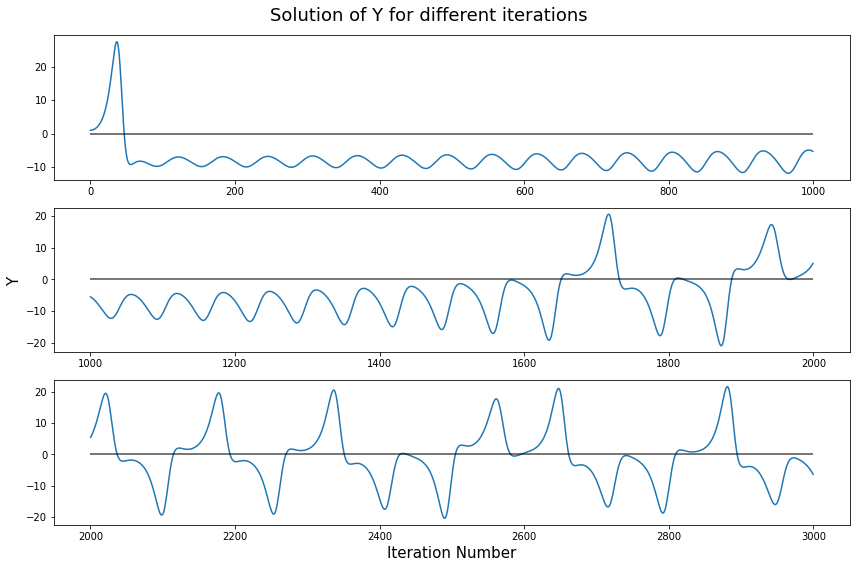

In [10]:
fig, ax = plt.subplots(3,1, figsize=(12,8))

#making 0-1000 plot
plt.suptitle('Solution of Y for different iterations', fontsize=18)
ax[0].plot(plt_tEval[:1000], Ysol[:1000])
ax[0].hlines(y=0, xmin=0, xmax=1000, color='k', alpha=0.7)


#making the 1000-2000 plot 
ax[1].plot(plt_tEval[1000:2000], Ysol[1000:2000])
ax[1].hlines(y=0, xmin=1000, xmax=2000, color='k', alpha=0.7)

ax[1].set_ylabel('Y', fontsize =15)

#making 2000 - 3000 plot 
ax[2].plot(plt_tEval[2000:3000], Ysol[2000:3000])
ax[2].hlines(y=0, xmin=2000, xmax=3000, color='k', alpha=0.7)
ax[2].set_xlabel('Iteration Number', fontsize =15)


plt.tight_layout()
plt.savefig('Y_evolution.pdf')
plt.savefig('Y_evolution.png')

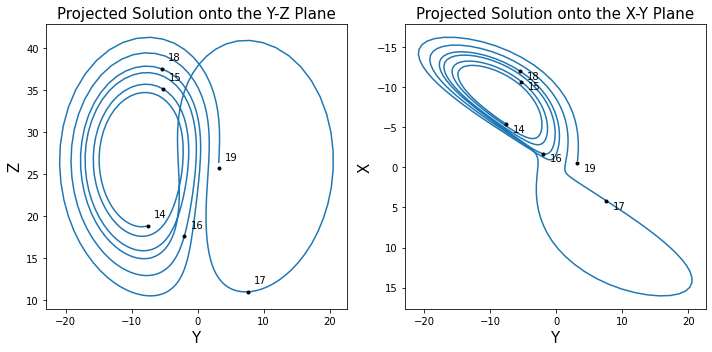

In [11]:
#Now reproduce Lorenz figure 2. 
fig, ax = plt.subplots(1,2, figsize=(10,5))


ax[0].plot(Ysol[1400:1900], Zsol[1400:1900])
ax[0].set_xlabel('Y', fontsize=15)
ax[0].set_ylabel('Z', fontsize=15)
ax[0].set_title("Projected Solution onto the Y-Z Plane", fontsize=15)


for i in range(1400, 2000, 100):
    ax[0].plot(Ysol[i], Zsol[i], 'ko', ms=3)
    ax[0].text(Ysol[i]+1, Zsol[i]+1, '%i' %(i/100))


ax[1].plot(Ysol[1400:1900], Xsol[1400:1900])
ax[1].set_xlabel('Y', fontsize=15)
ax[1].set_ylabel('X', fontsize=15)
ax[1].invert_yaxis()
ax[1].set_title("Projected Solution onto the X-Y Plane", fontsize=15)



for i in range(1400, 2000, 100):
    ax[1].plot(Ysol[i], Xsol[i], 'ko', ms=3)
    ax[1].text(Ysol[i]+1, Xsol[i]+1, '%i' %(i/100))
    

plt.tight_layout()

plt.savefig('Recreate_fig2.pdf')
plt.savefig('Recreate_fig2.png')
plt.show()



In [12]:
#now make new W that's perturbed a little bit 
W1 = W0 + np.array([0,1e-7,0])

#solving for perturbed solution 
Xsol2,Ysol2, Zsol2 = sol_lorenz_eqn(W1).y

In [13]:
#Now find difference between W0 and W1
#this is just the distance formula to find distance btwn two vectors 
W_diff = np.sqrt((Xsol - Xsol2)**2 + (Ysol - Ysol2)**2  +(Zsol - Zsol2)**2)

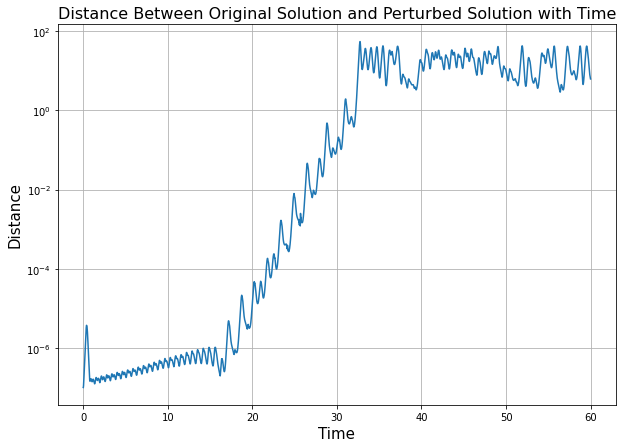

In [14]:
fig = plt.figure(figsize=(10,7))

plt.plot(tEval, W_diff)
plt.yscale('log')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Distance', fontsize=15)
plt.title('Distance Between Original Solution and Perturbed Solution with Time', fontsize=16)
plt.grid()
plt.savefig('Perturbation.pdf')
plt.savefig('Perturbation.png')
plt.show()